# **Online Retail Dataset - Retrived from UCI**

**Dataset Overview**

- **This is a transactional dataset** which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.
- **Number of Records:** 541,909
- **Number of Features:** 8
- **Source:** Chen, D. (2015). Online Retail [Dataset]. UCI Machine Learning Repository. [DOI:10.24432/C5BW33](https://doi.org/10.24432/C5BW33)

**Feature Description**

| Feature      | Description |
|-------------|------------|
| **InvoiceNo** | Unique transaction ID (prefix "C" indicates refunds). |
| **StockCode** | Unique item code in inventory. |
| **Description** | Name of the purchased item. |
| **Quantity** | Number of items in the transaction. |
| **InvoiceDate** | Transaction date and time. |
| **UnitPrice** | Price per item. |
| **CustomerID** | Unique customer identifier. |
| **Country** | Customer's country of residence. |



# **Import Required Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import norm, kstest, probplot, poisson, chisquare, ttest_ind, f_oneway, chisquare

# **Load the Dataset**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

data = pd.read_excel(url)

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# **Exploratory Data Analysis - EDA**

## **Data Overview**



*   **Number of Records and Features**




In [ ]:
raw_df = data.copy()

num_records = raw_df.shape[0]
num_features = raw_df.shape[1]

print("Number of records:", num_records)
print("Number of features:", num_features)

Number of records: 541909
Number of features: 8




*   **Column heading**



In [ ]:
print(raw_df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')




*   **Data Type of Each Variable**




In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB




*   **Check for Missing Values**




In [ ]:
raw_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0




*   **Drop Null Values**




In [ ]:
raw_df.dropna(inplace=True)

raw_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France




*   **Check for Duplicate Value**



In [ ]:
for col in raw_df.columns:
    duplicated_values = raw_df[col][raw_df[col].duplicated()]
    if not duplicated_values.empty:
        print(f"Column '{col}' has {duplicated_values.count()} duplicated values.")
    else:
        print(f"Column '{col}' has no duplicated values.\n")

Column 'InvoiceNo' has 384639 duplicated values.
Column 'StockCode' has 403145 duplicated values.
Column 'Description' has 402933 duplicated values.
Column 'Quantity' has 406393 duplicated values.
Column 'InvoiceDate' has 386369 duplicated values.
Column 'UnitPrice' has 406209 duplicated values.
Column 'CustomerID' has 402457 duplicated values.
Column 'Country' has 406792 duplicated values.


In [ ]:
duplicate_rows_all = raw_df[raw_df.duplicated(keep=False)]
duplicate_rows_all

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


## **Descriptive Statistical Analysis**



*   **Count Unique Values**



In [ ]:
print("Number of Unique Product Names:", raw_df["Description"].nunique())

print("Number of Unique Invoices:", raw_df["InvoiceNo"].nunique())

print("Number of Unique Customer IDs:", raw_df["CustomerID"].nunique())

print("Number of Unique Countries:", raw_df["Country"].nunique())

Number of Unique Product Names: 3896
Number of Unique Invoices: 22190
Number of Unique Customer IDs: 4372
Number of Unique Countries: 37



*   **Total Amount per Transaction**



In [ ]:
raw_df["TotalAmount"] = raw_df["Quantity"] * raw_df["UnitPrice"]

raw_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34




*   **Total Amount per Invoice**



In [ ]:
raw_df.groupby("InvoiceNo").agg({"TotalAmount": "sum"}).sort_values("TotalAmount", ascending=False)

,TotalAmount
InvoiceNo,
581483,168469.60
541431,77183.60
556444,38970.00
567423,31698.16
556917,22775.93
...,...
C570556,-11816.64
C550456,-22998.40
C556445,-38970.00




*   **List All Refunded Invoices**



In [ ]:
raw_df['InvoiceNo'] = raw_df['InvoiceNo'].astype(str)

raw_df_refunded = raw_df[raw_df['InvoiceNo'].str.contains('C')]

raw_df_refunded

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25




*   **Total Units Purchased per Product**




In [ ]:
raw_df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409
...,...
PINK POODLE HANGING DECORATION,-12
CRUK Commission,-16
ASSORTED TUTTI FRUTTI ROUND BOX,-24


*   **Summary Statistics**

> **Canceled Invoices:** Invoices that are canceled start with the letter **C**.

> **Negative Quantity:** The negative values in the **Quantity** column represent refunded items, where the refunded charges are summed up.


In [ ]:
raw_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,406829.0,12.061303,-80995.0,2.0,5.0,12.0,80995.0,248.69337
InvoiceDate,406829,2011-07-10 16:30:57.879207424,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-31 11:48:00,2011-10-20 13:06:00,2011-12-09 12:50:00,NaN
UnitPrice,406829.0,3.460471,0.0,1.25,1.95,3.75,38970.0,69.315162
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
TotalAmount,406829.0,20.401854,-168469.6,4.2,11.1,19.5,168469.6,427.591718




*   **Top 10 Most Common Refunded Invoice Descriptions**




In [ ]:
refunded_description = raw_df_refunded["Description"].value_counts()[:10].reset_index()
refunded_description.columns = ['Description', 'Count']

fig = px.pie(
    refunded_description,
    names='Description',
    values='Count',
    title="Proportion of Refunded Products",
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.show()



*   **Remove Refunded Transactions**

In [ ]:
raw_df = raw_df[~raw_df["InvoiceNo"].str.contains("C", na = False)]

raw_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60




*   **Impact of Returns on Sales**



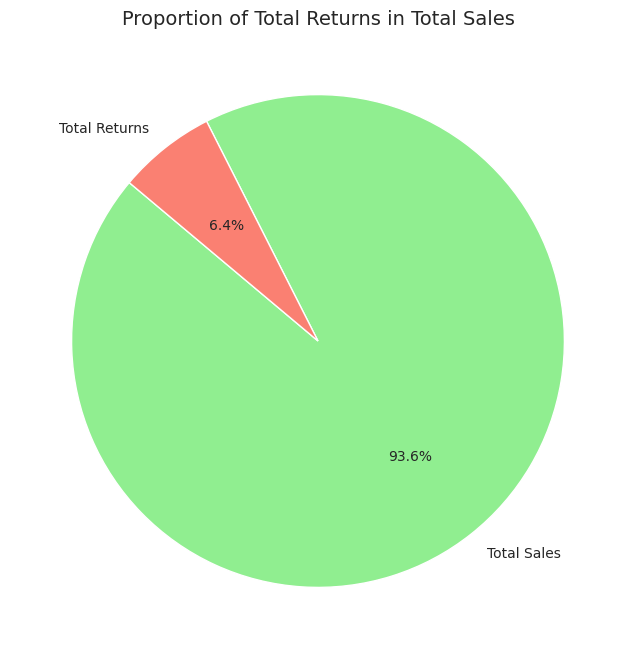

In [ ]:
total_sales = raw_df["TotalAmount"].sum()
total_return = abs(raw_df_refunded["TotalAmount"].sum())

gross_total_sales = total_sales + total_return
percentage_return = (total_return / gross_total_sales) * 100

labels = ['Total Sales', 'Total Returns']
sizes = [total_sales, total_return]
colors = ['lightgreen', 'salmon']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Total Returns in Total Sales', fontsize=14)
plt.show()



*   **Identify Zero-Priced Transactions**




In [ ]:
raw_df_ZeroPrice = raw_df[raw_df['UnitPrice'] == 0]

raw_df_ZeroPrice.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0




*   **Drop Transactions with Zero Price**


In [ ]:
raw_df = raw_df.drop(raw_df[raw_df['UnitPrice'] == 0.0].index)

raw_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60




*   **Extract Date and Time Features from InvoiceDate**



In [ ]:
raw_df['InvoiceDate'] = pd.to_datetime(raw_df['InvoiceDate'])

raw_df['Date'] = raw_df['InvoiceDate'].dt.strftime('%m/%d/%Y')
raw_df['Month'] = raw_df['InvoiceDate'].dt.strftime('%B')
raw_df['DayOfWeek'] = raw_df['InvoiceDate'].dt.strftime('%A')
raw_df['Hour'] = raw_df['InvoiceDate'].dt.strftime('%H')

raw_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Date,Month,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12/01/2010,December,Wednesday,08
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12/01/2010,December,Wednesday,08
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12/01/2010,December,Wednesday,08
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12/01/2010,December,Wednesday,08
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12/01/2010,December,Wednesday,08




*   **Top 10 Most Popular Products**



In [ ]:
most_popular_products = raw_df['Description'].value_counts()[:10]

fig = px.bar(x=most_popular_products.index,
             y=most_popular_products.values,
             color=most_popular_products.index,
             text=most_popular_products.values,
             title="Top 10 Most Popular Products",
             labels={'x': 'Product', 'y': 'Count'})

fig.update_layout(
    xaxis_title="Product",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

fig.show()



*   **Top 10 Countries with the Most Customers**



In [ ]:
countries = raw_df['Country'].value_counts()[:10]

fig = px.bar(x=countries.index,
             y=countries.values,
             color=countries.index,
             text=countries.values,
             title="Customer Base by Countries",
             labels={'x': 'Country', 'y': 'Count'})

fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

fig.show()



*   **Visualize Total Sales by Month**



In [ ]:
raw_df_total_amount_of_months = raw_df.groupby('Month').agg({'TotalAmount': 'sum'}).reset_index()

fig = px.line(
    raw_df_total_amount_of_months,
    x='Month',
    y='TotalAmount',
    title='Total Sales by Month',
    markers=True
)

fig.update_traces(
    text=raw_df_total_amount_of_months['TotalAmount'],
    textposition='top center',
    line=dict(width=2, color='darkblue')
)

fig.update_layout(
    xaxis_title='Months of the Year',
    yaxis_title='Total Price',
    font=dict(size=12),
    title_font=dict(size=16),
    xaxis=dict(
        tickangle=45,
        showgrid=True,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgray'
    ),
    plot_bgcolor='white'
)

fig.show()



*   **Day of the Week with the Highest Sales**




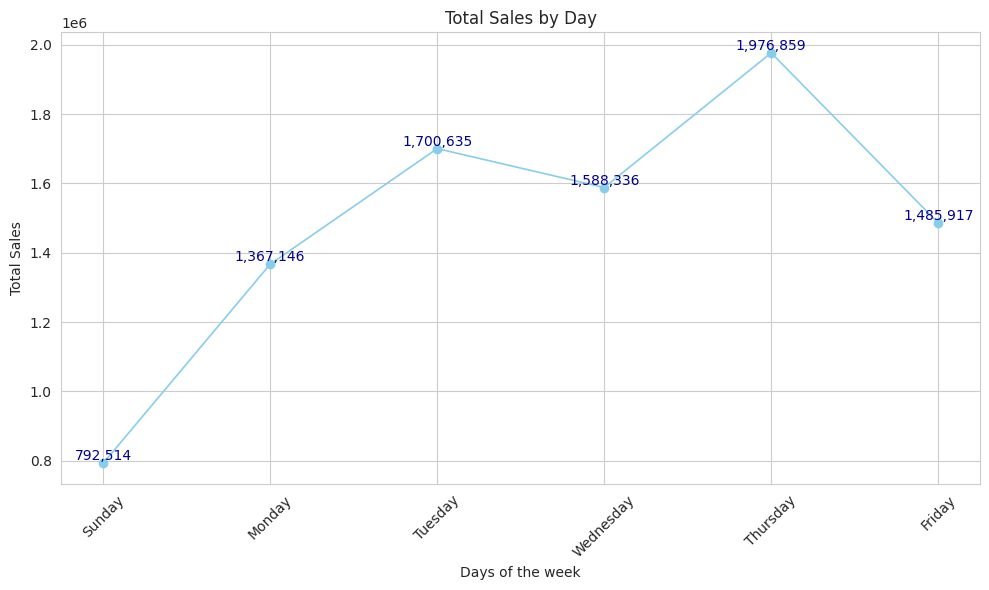

In [ ]:
raw_df_total_amount_by_day = raw_df.groupby('DayOfWeek').agg({'TotalAmount': 'sum'}).reset_index()

raw_df_total_amount_by_day['DayOfWeek'] = pd.Categorical(
    raw_df_total_amount_by_day['DayOfWeek'],
    categories=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"],
    ordered=True
)
raw_df_total_amount_by_day = raw_df_total_amount_by_day.sort_values('DayOfWeek')

plt.figure(figsize=(10, 6))

plt.plot(raw_df_total_amount_by_day['DayOfWeek'], raw_df_total_amount_by_day['TotalAmount'],
         marker='o', color='skyblue', linewidth=1.2, markersize=6)

for i, val in enumerate(raw_df_total_amount_by_day['TotalAmount']):
    plt.text(i, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=10, color='darkblue')

plt.title('Total Sales by Day')
plt.xlabel('Days of the week')
plt.ylabel('Total Sales')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()



*   **Peak Shopping Hours Throughout the Day**



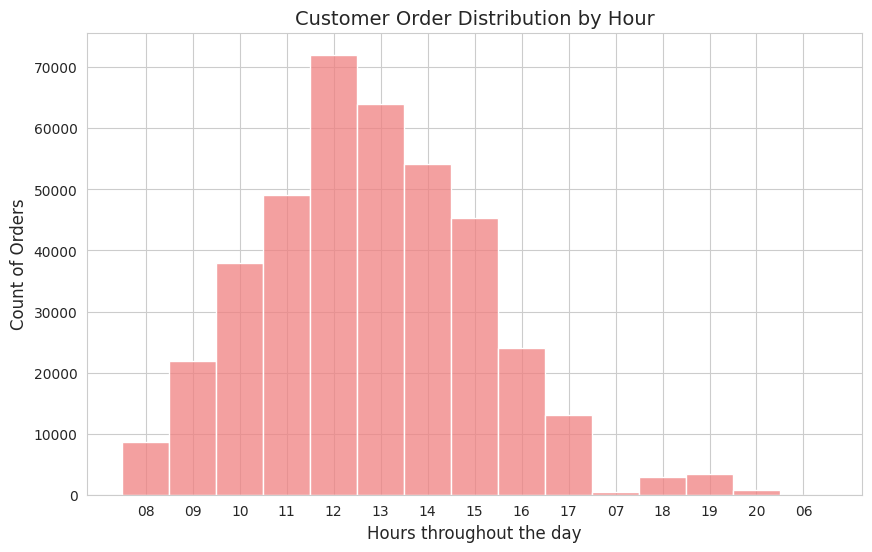

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=raw_df, x='Hour', bins=24, color='lightcoral', kde=False)

plt.xlabel('Hours throughout the day', fontsize=12)
plt.ylabel('Count of Orders', fontsize=12)
plt.title('Customer Order Distribution by Hour', fontsize=14)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()



## **Outlier Detection**





*   **Using IQR Method**




Quantity Feature:
Q1 = 2.0
Q2 = 6.0
Q3 = 12.0
IQR = 10.0
Quantity: Lower Bound = -13.0, Upper Bound = 27.0
Number of Outliers in Quantity: 25647


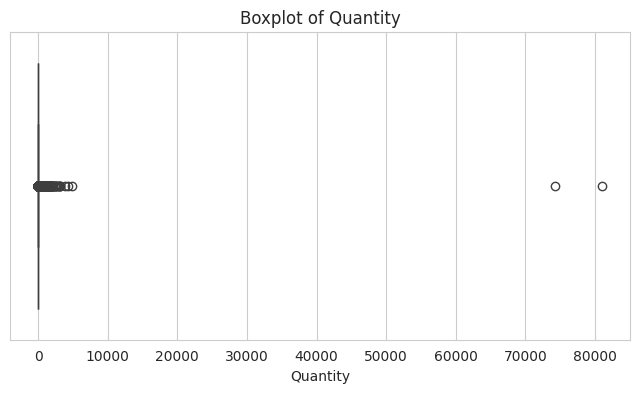

--------------------------------------------------------------------------------------
UnitPrice Feature:
Q1 = 1.25
Q2 = 1.95
Q3 = 3.75
IQR = 2.5
UnitPrice: Lower Bound = -2.5, Upper Bound = 7.5
Number of Outliers in UnitPrice: 34356


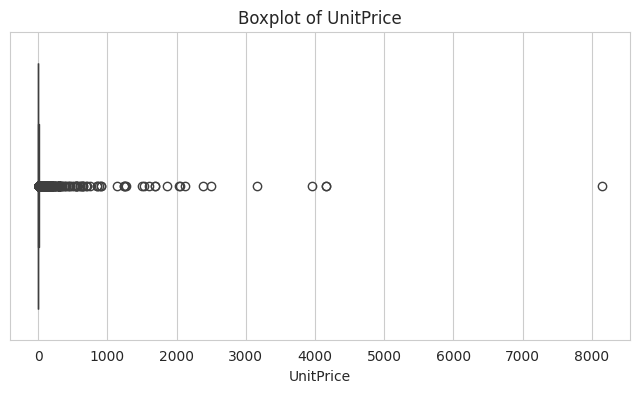

--------------------------------------------------------------------------------------
TotalAmount Feature:
Q1 = 4.68
Q2 = 11.8
Q3 = 19.799999999999997
IQR = 15.119999999999997
TotalAmount: Lower Bound = -17.999999999999996, Upper Bound = 42.47999999999999
Number of Outliers in TotalAmount: 31241


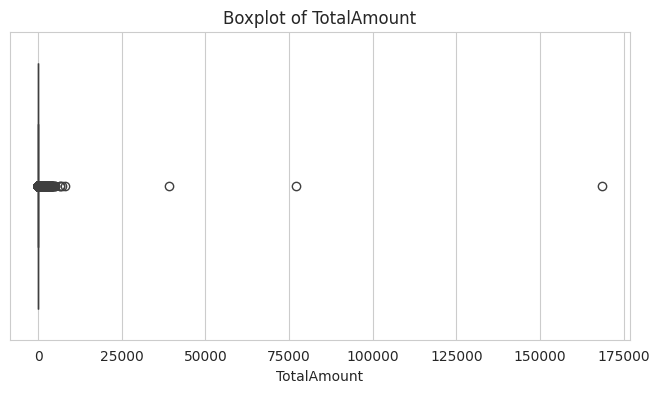

--------------------------------------------------------------------------------------


In [ ]:
outliers_dict = {}

for col in ["Quantity", "UnitPrice", "TotalAmount"]:
    Q1 = raw_df[col].quantile(0.25)
    Q2 = raw_df[col].quantile(0.5)
    Q3 = raw_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{col} Feature:")
    print("Q1 =", Q1)
    print("Q2 =", Q2)
    print("Q3 =", Q3)
    print("IQR =", IQR)
    print(f"{col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

    outliers = raw_df[(raw_df[col] < lower_bound) | (raw_df[col] > upper_bound)]
    print(f"Number of Outliers in {col}: {outliers.shape[0]}")

    outliers_dict[col] = outliers.index.tolist()

    plt.figure(figsize=(8,4))
    sns.boxplot(x=raw_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

    print("--------------------------------------------------------------------------------------")



*   **Remove All Outlier Values**



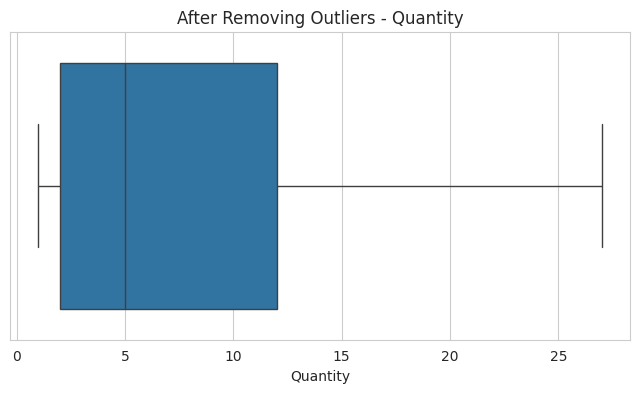

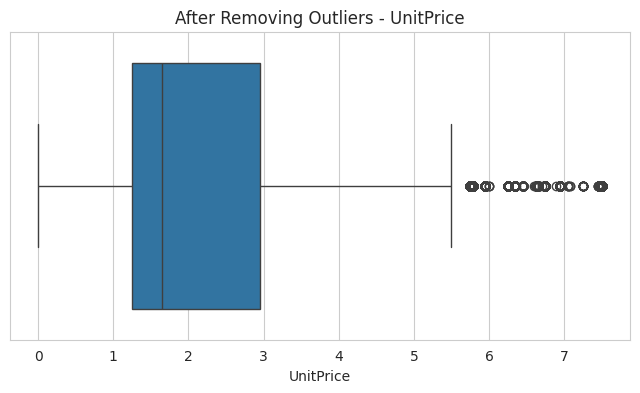

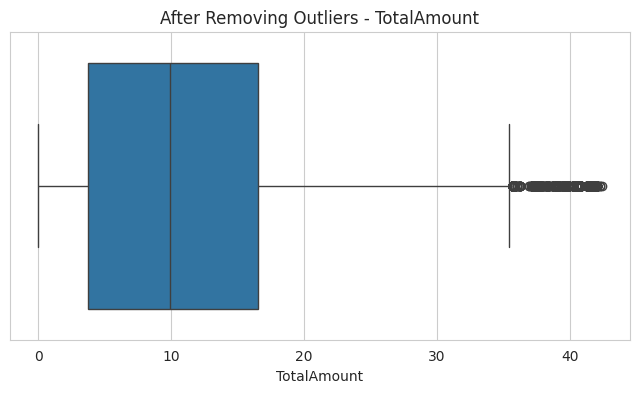

In [ ]:
all_outliers = set()
for indexes in outliers_dict.values():
    all_outliers.update(indexes)

df = raw_df.drop(index=all_outliers)

for col in ["Quantity", "UnitPrice", "TotalAmount"]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"After Removing Outliers - {col}")
    plt.show()

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,328638.0,7.200564,1.0,2.0,5.0,12.0,27.0,6.591111
InvoiceDate,328638,2011-07-12 21:00:29.840614656,2010-12-01 08:26:00,2011-04-08 10:19:00,2011-08-03 14:07:00,2011-10-23 14:47:00,2011-12-09 12:50:00,NaN
UnitPrice,328638.0,2.131113,0.001,1.25,1.65,2.95,7.5,1.501096
CustomerID,328638.0,15334.63454,12347.0,14005.0,15265.0,16839.0,18287.0,1709.779822
TotalAmount,328638.0,11.204715,0.001,3.75,9.9,16.5,42.4,8.786427


In [ ]:
print("Dataset after removing outlier:", df.shape)

Dataset after removing outlier: (328638, 13)


## **Dataset Insight Summary**


*  **Invoices:** Over 22,000 unique Invoice Numbers.

*  **Stock Codes:** Approximately 3,900 unique Stock Codes.

*  **Countries:** 37 unique countries, with the United Kingdom contributing over 354,000 rows (~89% of the dataset).

*  **Average Sale Amount:** ~$20.00.

*  **Returns:** Refunded sales account for 6.4% of total revenue.

*  **Top-Selling Product:** WORLD WAR 2 GLIDERS ASSTD DESIGNS with over 53,000 units sold.

*  **Most Returned Product:** ROTATING SILVER ANGELS T-LIGHT HLDR with over 1,400 units refunded.

*  **Popular Product:** WHITE HANGING HEART T-LIGHT HOLDER found in 2,000+ transactions.

*  **Best Month:** November with $1.1 million in sales.

*  **Best Day:** Thursday with nearly $2 million in sales.

*  **Time of Purchase:** Peak purchasing occurs between 11 AM and 2 PM.



# **Probability Distribution**



*   **Plotting Histograms with KDE**



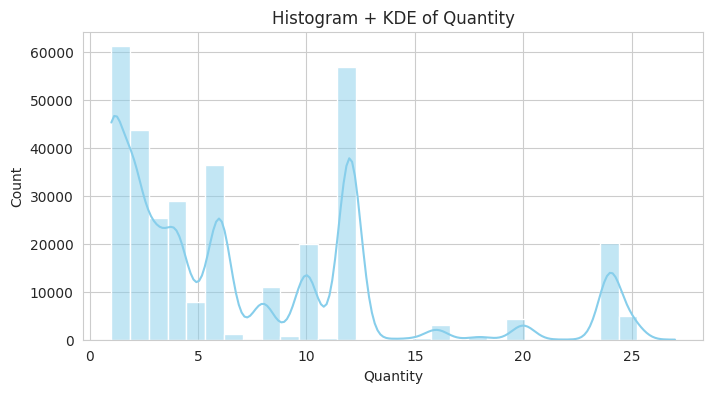

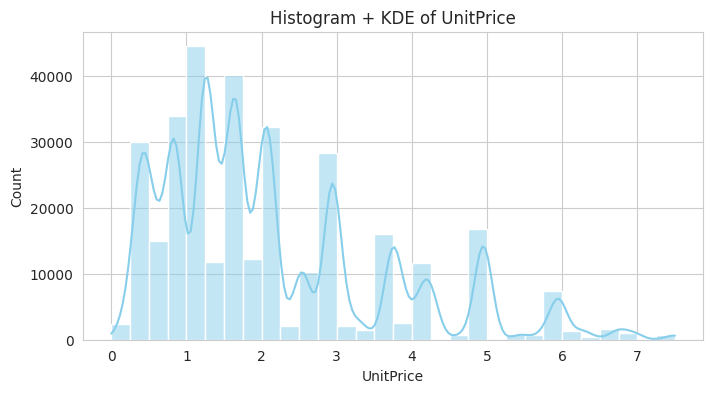

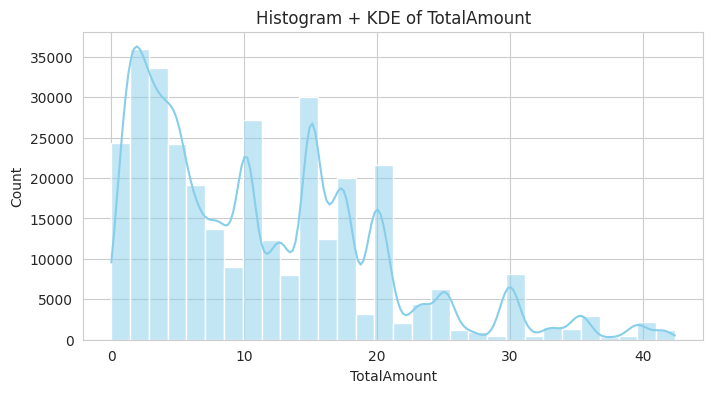

In [ ]:
cols = ["Quantity", "UnitPrice", "TotalAmount"]

def plot_histograms_kde(df, col):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Histogram + KDE of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

for col in cols:
  plot_histograms_kde(df, col)



*   **Comparing Column Distribution to Normal Distribution**
> By overlaying a normal curve (with the same mean and standard deviation), we can visually assess the mismatch between the actual data and the idealized normal assumption.

In [ ]:
def norm_visualize(df, col_name):
    data = pd.to_numeric(df[col_name], errors='coerce').dropna()
    mu, std = data.mean(), data.std()
    plt.figure(figsize=(8, 4))
    sns.histplot(data, bins=30, kde=True, stat='density', alpha=0.4, color='skyblue', label='Histogram + KDE')
    x = np.linspace(data.min(), data.max(), 100)
    plt.plot(x, norm.pdf(x, mu, std), 'r--', linewidth=2, label=f'N(μ={mu:.2f}, σ={std:.2f})')
    plt.title(f"Distribution of {col_name} vs Normal")
    plt.xlabel(col_name)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

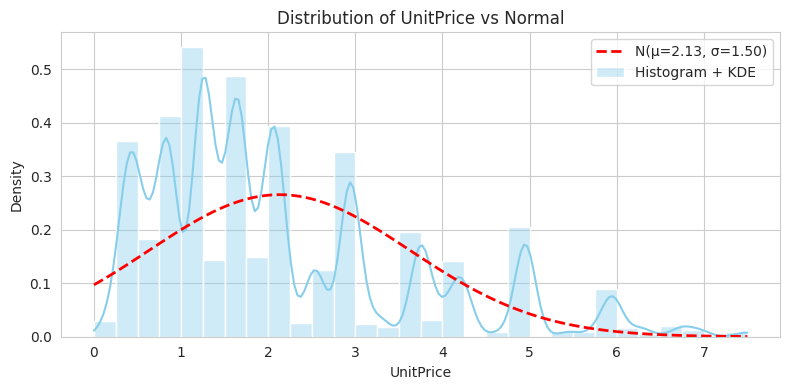

In [ ]:
norm_visualize(df, 'UnitPrice')

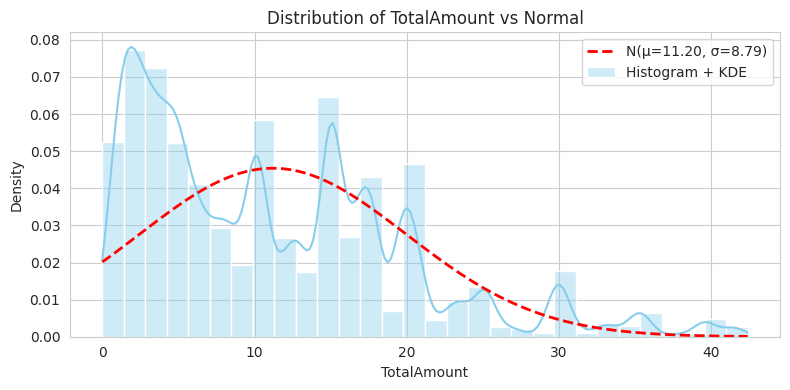

In [ ]:
norm_visualize(df, 'TotalAmount')



*   **Q-Q Plot to Compare Column Distribution with Normal Distribution**



In [ ]:
def norm_qq(df, col):
    data = pd.to_numeric(df[col], errors='coerce').dropna()
    plt.figure(figsize=(6, 5))
    probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {col} vs Normal")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

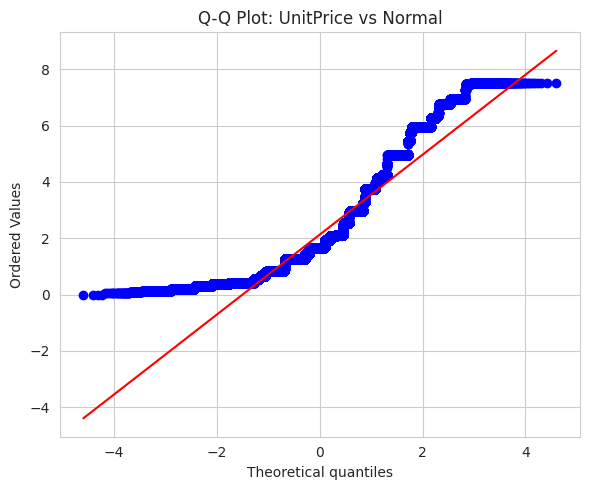

In [ ]:
norm_qq(df, 'UnitPrice')

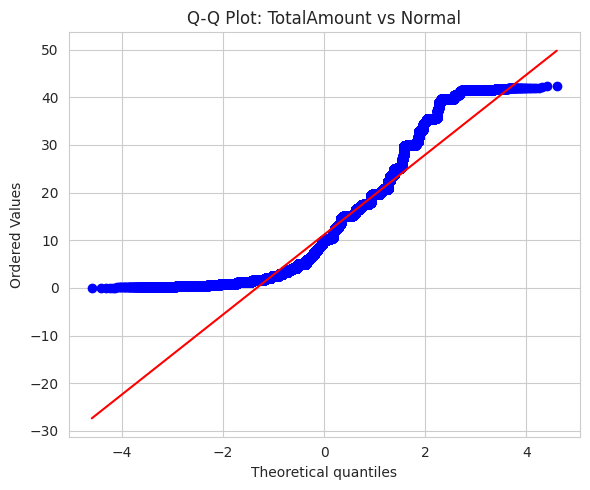

In [ ]:
norm_qq(df, 'TotalAmount')



*   **Normality Test Using Shapiro-Wilk Method**



In [ ]:
def shapiro_wilk(df, col, alpha=0.05):
  data = pd.to_numeric(df[col], errors='coerce').dropna()
  stat, p = stats.shapiro(data)
  print("KẾT QUẢ KIỂM ĐỊNH 'Shapiro-Wilk'")
  print("- Giá trị thống kê:", stat)
  print("- P-value:", p)
  print("- Mức ý nghĩa (alpha):", alpha)
  print("\nKẾT LUẬN:")
  if p > alpha:
      print("Dữ liệu có phân phối chuẩn (không bác bỏ H0)")
  else:
      print("Dữ liệu KHÔNG có phân phối chuẩn (bác bỏ H0)")

In [ ]:
shapiro_wilk(df, 'UnitPrice')

KẾT QUẢ KIỂM ĐỊNH 'Shapiro-Wilk'
- Giá trị thống kê: 0.8926179210705665
- P-value: 8.525266031455219e-139
- Mức ý nghĩa (alpha): 0.05

KẾT LUẬN:
Dữ liệu KHÔNG có phân phối chuẩn (bác bỏ H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 328638.



In [ ]:
shapiro_wilk(df, 'TotalAmount')

KẾT QUẢ KIỂM ĐỊNH 'Shapiro-Wilk'
- Giá trị thống kê: 0.9111003495626557
- P-value: 5.0221484057798715e-133
- Mức ý nghĩa (alpha): 0.05

KẾT LUẬN:
Dữ liệu KHÔNG có phân phối chuẩn (bác bỏ H0)




*   **Normality Test Using Kolmogorov–Smirnov Method**


In [ ]:
def kolmogorov_smirnov(df, col, alpha=0.05):
  data = pd.to_numeric(df[col], errors='coerce').dropna()
  mu, sigma = np.mean(data), np.std(data)
  stat, p = stats.kstest(data, 'norm', args=(mu, sigma))
  print("KẾT QUẢ KIỂM ĐỊNH 'Kolmogorov–Smirnov'")
  print("- Giá trị thống kê:", stat)
  print("- P-value:", p)
  print("- Mức ý nghĩa (alpha):", alpha)
  print(f"- Tham số ước lượng: μ={mu:.4f}, σ={sigma:.4f}")
  print("\nKẾT LUẬN:")
  if p > alpha:
      print("Dữ liệu có phân phối chuẩn (không bác bỏ H0)")
  else:
      print("Dữ liệu KHÔNG có phân phối chuẩn (bác bỏ H0)")

In [ ]:
kolmogorov_smirnov(df, "UnitPrice")

KẾT QUẢ KIỂM ĐỊNH 'Kolmogorov–Smirnov'
- Giá trị thống kê: 0.18224696125378143
- P-value: 0.0
- Mức ý nghĩa (alpha): 0.05
- Tham số ước lượng: μ=2.1311, σ=1.5011

KẾT LUẬN:
Dữ liệu KHÔNG có phân phối chuẩn (bác bỏ H0)


In [ ]:
kolmogorov_smirnov(df, "TotalAmount")

KẾT QUẢ KIỂM ĐỊNH 'Kolmogorov–Smirnov'
- Giá trị thống kê: 0.11407069805238551
- P-value: 0.0
- Mức ý nghĩa (alpha): 0.05
- Tham số ước lượng: μ=11.2047, σ=8.7864

KẾT LUẬN:
Dữ liệu KHÔNG có phân phối chuẩn (bác bỏ H0)




*   **Poission Distribution Testing**



In [ ]:
def poisson_visualize(df, col_name):
    data = pd.to_numeric(df[col_name], errors='coerce').dropna()
    mu = data.mean()
    values, counts = np.unique(data, return_counts=True)
    probs = counts / counts.sum()
    plt.figure(figsize=(8, 4))
    plt.bar(values, probs, alpha=0.7, color='skyblue', label='Observed')
    plt.plot(values, poisson.pmf(values, mu), 'ro-', label=f'Poisson (μ={mu:.2f})')
    plt.title(f"Distribution of {col_name} vs Poisson")
    plt.xlabel(col_name)
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

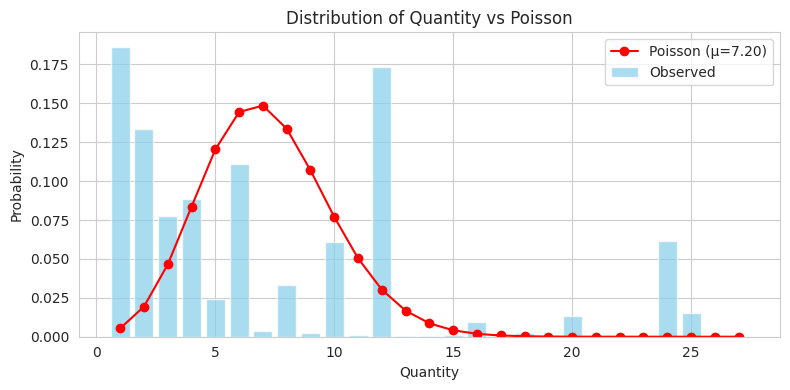

In [ ]:
poisson_visualize(df, 'Quantity')



*   **Poission Chi Squared Testing**



In [ ]:
def poisson_chi_square(df, col_name, alpha=0.05):
    data = pd.to_numeric(df[col_name], errors='coerce').dropna()
    mu = data.mean()
    values, counts = np.unique(data, return_counts=True)
    expected = poisson.pmf(values, mu) * len(data)
    while np.any(expected < 5) and len(expected) > 3:
        values = np.append(values[:-2], values[-2])
        counts = np.append(counts[:-2], counts[-2] + counts[-1])
        expected = np.append(expected[:-2], expected[-2] + expected[-1])
    if len(counts) != len(expected):
        raise ValueError("Chiều dài counts và expected không khớp sau khi gộp")
    expected = expected * (counts.sum() / expected.sum())

    stat, p = chisquare(counts, expected)
    print("- Chi-Square:")
    print(f"  Statistic = {stat:.4f}, p-value = {p:.4f}")
    print(f"  Kết luận: {'Dữ liệu có phân phối Poisson' if p > alpha else 'Dữ liệu KHÔNG có phân phối Poisson'}")

In [ ]:
poisson_chi_square(df, 'Quantity')

- Chi-Square:
  Statistic = 93559288.5675, p-value = 0.0000
  Kết luận: Dữ liệu KHÔNG có phân phối Poisson




*   **Poission Dispersion Testing**




In [ ]:
def poisson_dispersion(df, col_name):
  data = pd.to_numeric(df[col_name], errors='coerce').dropna()
  mu = data.mean()
  variance = data.var()
  dispersion = (variance / mu) - 1
  print("- Dispersion:")
  print(f"  Statistic = {dispersion:.4f}")
  print(f"  Kết luận: {'Dữ liệu có phân phối Poisson' if abs(dispersion) < 0.5 else 'Dữ liệu KHÔNG có phân phối Poisson'}")

In [ ]:
poisson_dispersion(df, 'Quantity')

- Dispersion:
  Statistic = 5.0332
  Kết luận: Dữ liệu KHÔNG có phân phối Poisson


> **'Quantity'** is a *discrete* variable, so it is suitable for testing with the **Poisson distribution**.

> *On the other hand*, **'UnitPrice'** and **'TotalAmount'** are *continuous* variables, should be tested with the **Normal distribution**.

# **Hypothesis Testing**

**Question**: Is there a difference in the average spending (**TotalAmount**) between *different countries*?



*   **t-test Method**

>  T-test is suitable for continuous variables and for comparing between two groups.


In [ ]:
countries = ['United Kingdom', 'Germany']
df_2_countries = df[df['Country'].isin(countries)]
group_uk = df_2_countries[df_2_countries['Country'] == 'United Kingdom']['TotalAmount']
group_germany = df_2_countries[df_2_countries['Country'] == 'Germany']['TotalAmount']

In [ ]:
stat, p = ttest_ind(group_uk, group_germany, equal_var=False)
print("== T-Test: UK vs Germany ==")
print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")
if p < 0.05:
    print("→ Có sự khác biệt có ý nghĩa thống kê về chi tiêu trung bình giữa 2 quốc gia.")
else:
    print("→ Không có sự khác biệt có ý nghĩa thống kê.")

== T-Test: UK vs Germany ==
Statistic: -64.5891, p-value: 0.0000
→ Có sự khác biệt có ý nghĩa thống kê về chi tiêu trung bình giữa 2 quốc gia.


<ipython-input-105-86b7c88d2313>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-105-86b7c88d2313>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




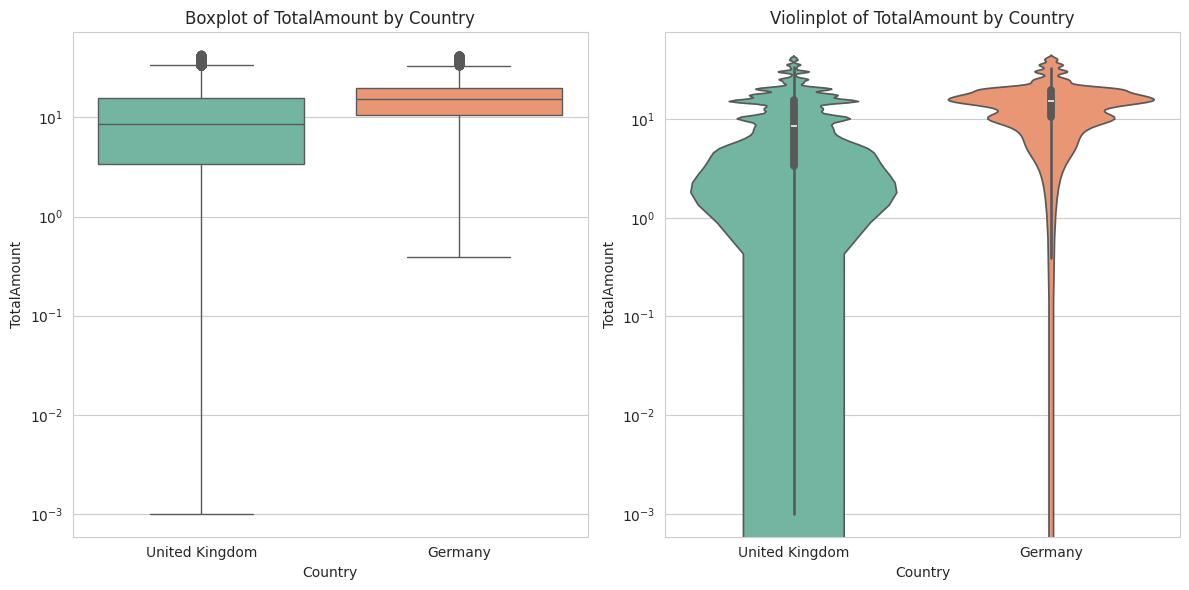

In [ ]:
df_2_countries = df[df['Country'].isin(['United Kingdom', 'Germany'])]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_2_countries, x='Country', y='TotalAmount', palette='Set2')
plt.yscale('log')
plt.title("Boxplot of TotalAmount by Country")
plt.subplot(1, 2, 2)
sns.violinplot(data=df_2_countries, x='Country', y='TotalAmount', palette='Set2')
plt.yscale('log')
plt.title("Violinplot of TotalAmount by Country")
plt.tight_layout()
plt.show()

> The average spending (**TotalAmount**) between customers from the UK and Germany differs significantly in a statistical sense.

**Insights from the plots:**

> Both the violin plot and boxplot indicate that customers from Germany tend to spend more than those from the UK.

> The spending distribution is skewed, with the presence of numerous outliers.



*   **ANOVA Method**




> ANOVA is also suitable for *continuous variables*. Unlike the t-test, it is **not limited** to comparing just two groups — it is also effective for comparing means across **three or more groups**.

In [ ]:
selected_countries = ['France', 'Spain', 'Netherlands']
df_selected = df[df['Country'].isin(selected_countries)]
groups = [df_selected[df_selected['Country'] == country]['TotalAmount'] for country in selected_countries]

In [ ]:
stat, p = f_oneway(*groups)
print("== ANOVA: France vs Spain vs Netherlands ==")
print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")
if p < 0.05:
    print("→ Có sự khác biệt có ý nghĩa thống kê về chi tiêu trung bình giữa các quốc gia.")
else:
    print("→ Không có sự khác biệt có ý nghĩa thống kê.")

== ANOVA: France vs Spain vs Netherlands ==
Statistic: 74.7459, p-value: 0.0000
→ Có sự khác biệt có ý nghĩa thống kê về chi tiêu trung bình giữa các quốc gia.


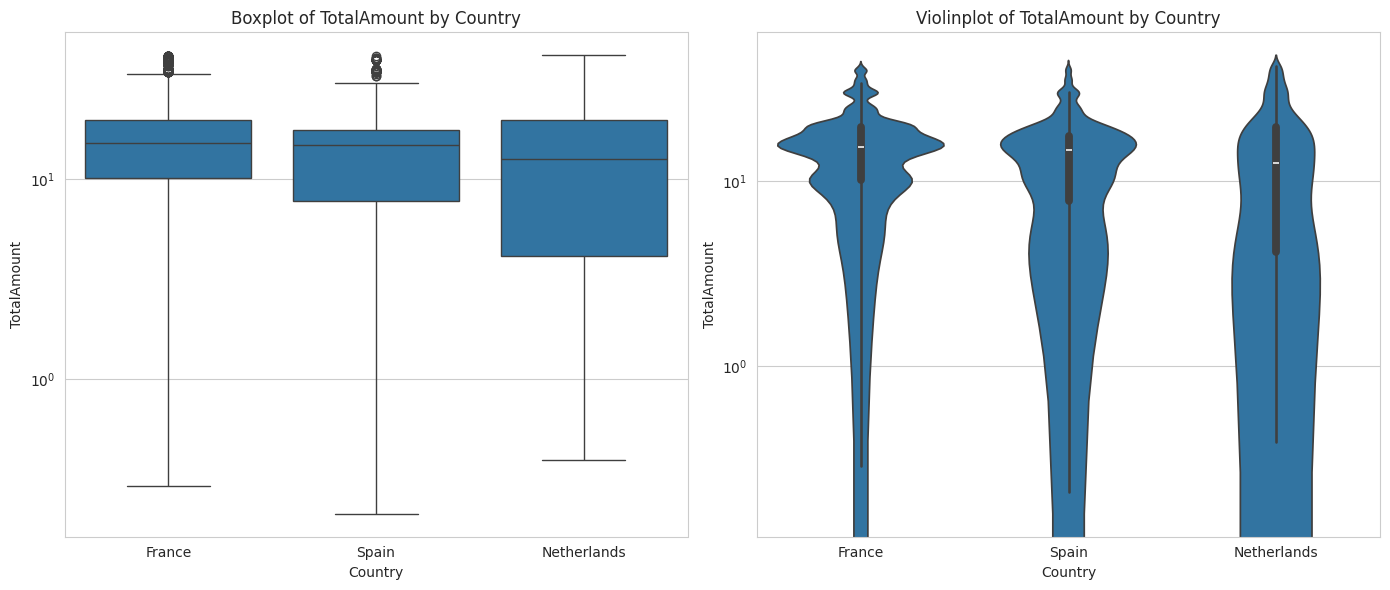

In [ ]:
selected_countries = ['France', 'Spain', 'Netherlands']
df_filtered = df[df['Country'].isin(selected_countries)]
df_filtered = df_filtered[['Country', 'TotalAmount']].dropna()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Country', y='TotalAmount', data=df_filtered)
plt.yscale('log')
plt.title("Boxplot of TotalAmount by Country")
plt.subplot(1, 2, 2)
sns.violinplot(x='Country', y='TotalAmount', data=df_filtered)
plt.yscale('log')
plt.title("Violinplot of TotalAmount by Country")
plt.tight_layout()
plt.show()

> At least one of the three countries has a significantly different average spending compared to the others.

**Insights from the plots:**

> Boxplot and violin plot reveal that the Netherlands has a higher spread in spending, with more high spenders (outliers).

> France and Spain appear relatively close in distribution, but differences in density and outliers still exist.

# **Correlation Analysis**



*   **Monthly Revenue Calculation and Numeric Month Conversion**




In [ ]:
monthly_revenue = df.groupby('Month')['TotalAmount'].sum().reset_index()
monthly_revenue.columns = ['Month', 'TotalAmountByMonth']

df = df.merge(monthly_revenue, on='Month', how='left')

month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

df['MonthNumeric'] = df['Month'].map(month_mapping)



*   **Daily Revenue Calculation and Numeric DayOfWeek Conversion**




In [ ]:
daily_revenue = df.groupby('DayOfWeek')['TotalAmount'].sum().reset_index()

daily_revenue.columns = ['DayOfWeek', 'TotalAmountDaily']

df = df.merge(daily_revenue, on='DayOfWeek', how='left')

day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

df['DayOfWeekNumeric'] = df['DayOfWeek'].map(day_mapping)

In [ ]:
daily_revenue

,DayOfWeek,TotalAmountDaily
0,Friday,550808.281
1,Monday,604929.091
2,Sunday,452164.331
3,Thursday,792006.580
4,Tuesday,630500.771
5,Wednesday,651886.010




*   **RFM Metrics**



In [ ]:
latest_date = df['InvoiceDate'].max()

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

df = df.merge(rfm, on='CustomerID', how='left')



*   **Dataset After Feature Engineering**



In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Date,Month,DayOfWeek,Hour,TotalAmountByMonth,MonthNumeric,TotalAmountDaily,DayOfWeekNumeric,Recency,Frequency,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12/01/2010,December,Wednesday,08,380260.52,12,651886.01,3,371,34,4411.16
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12/01/2010,December,Wednesday,08,380260.52,12,651886.01,3,371,34,4411.16
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12/01/2010,December,Wednesday,08,380260.52,12,651886.01,3,371,34,4411.16
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12/01/2010,December,Wednesday,08,380260.52,12,651886.01,3,371,34,4411.16
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12/01/2010,December,Wednesday,08,380260.52,12,651886.01,3,371,34,4411.16




*   **Heatmap of Pearson Correlation**



In [ ]:
cols = ['Quantity', 'UnitPrice', 'TotalAmount', "TotalAmountByMonth", "MonthNumeric", "TotalAmountDaily", "DayOfWeekNumeric", "Recency", "Frequency", "Monetary"]

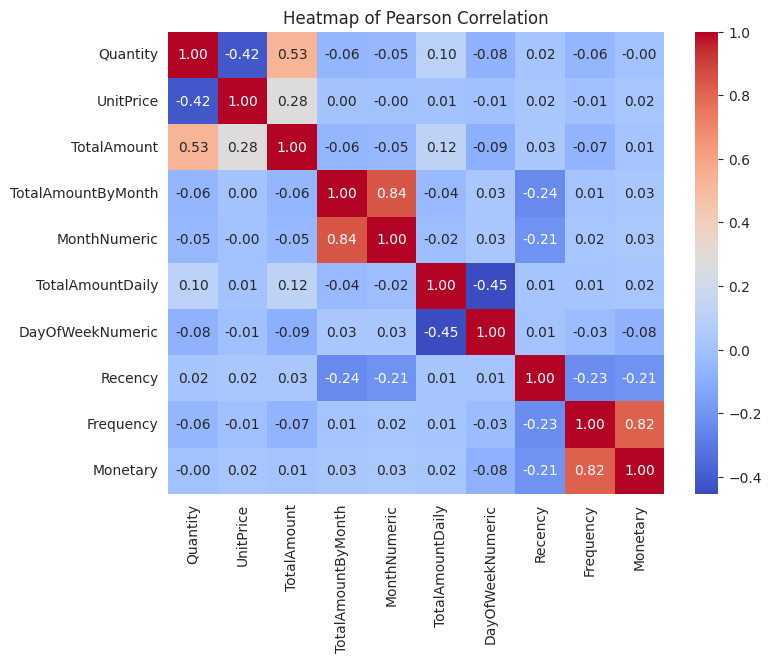

In [ ]:
pearson_corr= df[cols].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Pearson Correlation")
plt.show()



*   **Heatmap of Spearman Correlation**



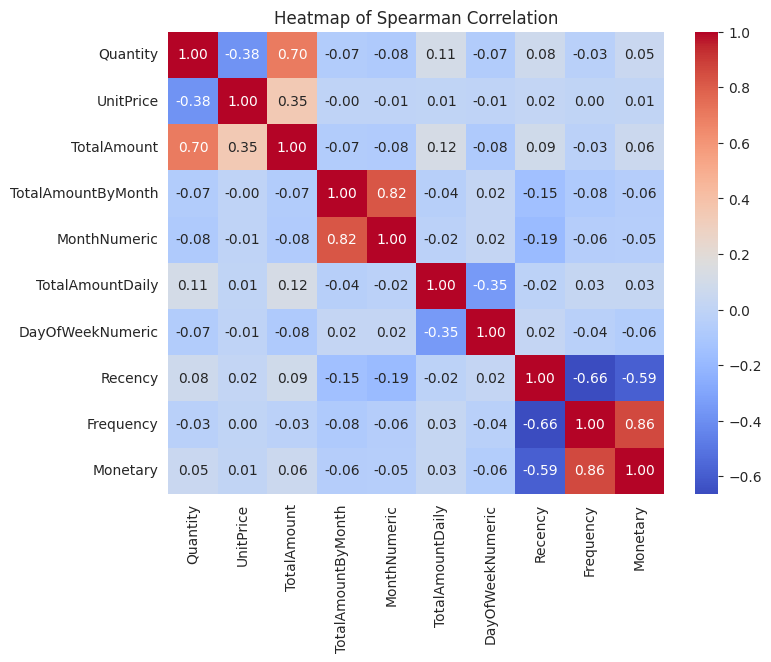

In [ ]:
spearman_corr= df[cols].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Spearman Correlation")
plt.show()



*   **Scatter Plots Between Quantity, Unit Price, and Total Amount**



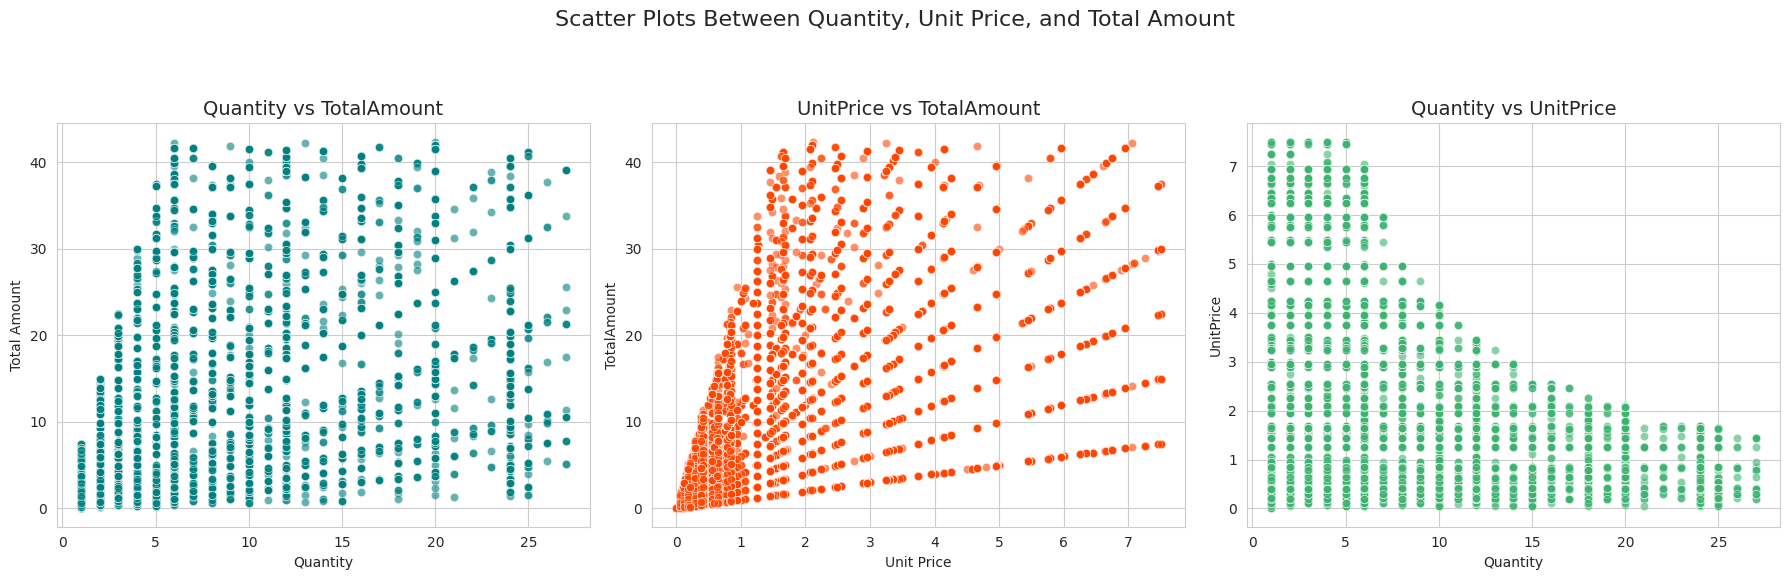

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df, x='Quantity', y='TotalAmount', ax=axs[0], color='teal', alpha=0.6)
axs[0].set_title("Quantity vs TotalAmount", fontsize=14)
axs[0].set_xlabel("Quantity")
axs[0].set_ylabel("Total Amount")

sns.scatterplot(data=df, x='UnitPrice', y='TotalAmount', ax=axs[1], color='orangered', alpha=0.6)
axs[1].set_title("UnitPrice vs TotalAmount", fontsize=14)
axs[1].set_xlabel("Unit Price")
axs[1].set_ylabel("TotalAmount")

sns.scatterplot(data=df, x='Quantity', y='UnitPrice', ax=axs[2], color='mediumseagreen', alpha=0.6)
axs[2].set_title("Quantity vs UnitPrice", fontsize=14)
axs[2].set_xlabel("Quantity")
axs[2].set_ylabel("UnitPrice")

plt.tight_layout()
plt.suptitle("Scatter Plots Between Quantity, Unit Price, and Total Amount", fontsize=16, y=1.15)
plt.show()



*   **Scatter Plot Between RFM Metríc**




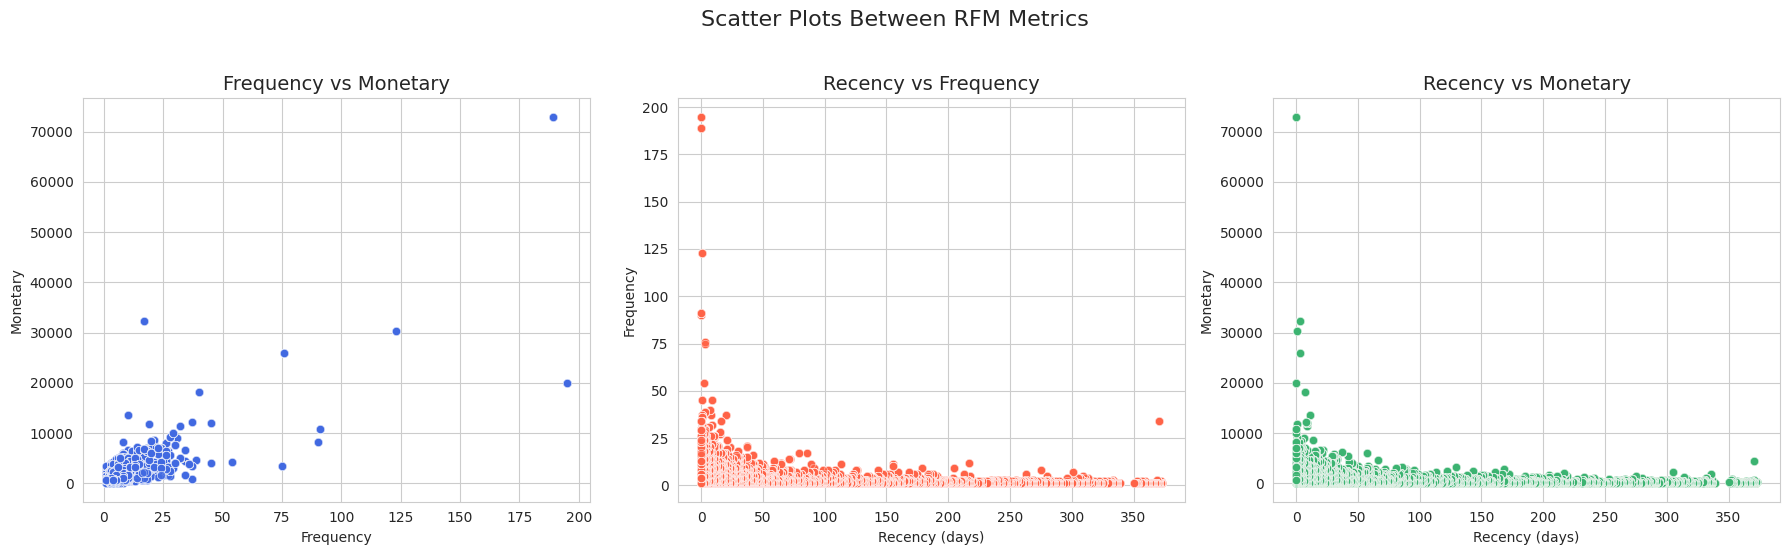

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df, x='Frequency', y='Monetary', ax=axs[0], color='royalblue', alpha=0.6)
axs[0].set_title("Frequency vs Monetary", fontsize=14)
axs[0].set_xlabel("Frequency")
axs[0].set_ylabel("Monetary")

sns.scatterplot(data=df, x='Recency', y='Frequency', ax=axs[1], color='tomato', alpha=0.6)
axs[1].set_title("Recency vs Frequency", fontsize=14)
axs[1].set_xlabel("Recency (days)")
axs[1].set_ylabel("Frequency")

sns.scatterplot(data=df, x='Recency', y='Monetary', ax=axs[2], color='mediumseagreen', alpha=0.6)
axs[2].set_title("Recency vs Monetary", fontsize=14)
axs[2].set_xlabel("Recency (days)")
axs[2].set_ylabel("Monetary")

plt.tight_layout()
plt.suptitle("Scatter Plots Between RFM Metrics", fontsize=16, y=1.1)
plt.show()



*   **Two Scatter Plots: Monthly Revenue vs. Month, Daily Revenue vs. Day of Week, Customer Invoices vs. Spending**



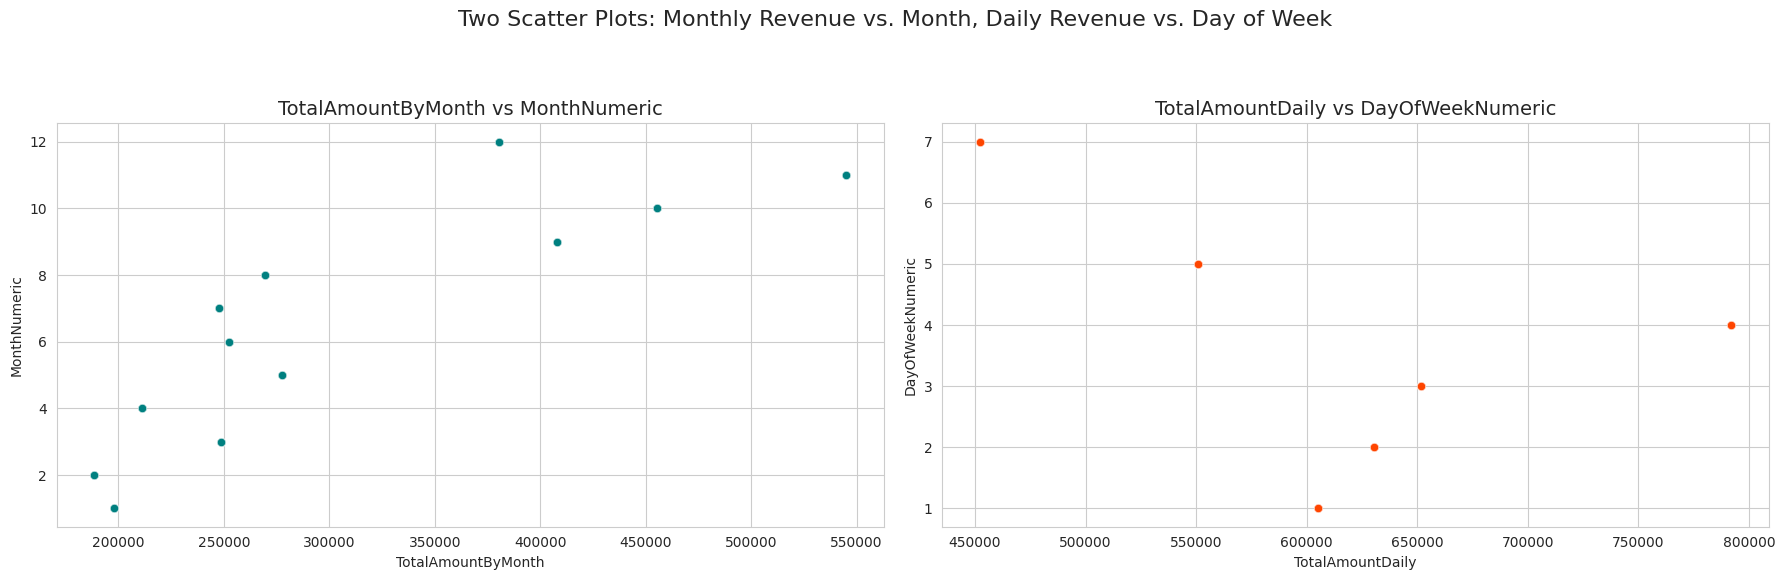

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

sns.scatterplot(data=df, x='TotalAmountByMonth', y='MonthNumeric', ax=axs[0], color='teal', alpha=0.6)
axs[0].set_title("TotalAmountByMonth vs MonthNumeric", fontsize=14)
axs[0].set_xlabel("TotalAmountByMonth")
axs[0].set_ylabel("MonthNumeric")

sns.scatterplot(data=df, x='TotalAmountDaily', y='DayOfWeekNumeric', ax=axs[1], color='orangered', alpha=0.6)
axs[1].set_title("TotalAmountDaily vs DayOfWeekNumeric", fontsize=14)
axs[1].set_xlabel("TotalAmountDaily")
axs[1].set_ylabel("DayOfWeekNumeric")

plt.tight_layout()
plt.suptitle("Two Scatter Plots: Monthly Revenue vs. Month, Daily Revenue vs. Day of Week", fontsize=16, y=1.15)
plt.show()

##   **Insights from Correlation Analysis**

* **Monthly Revenue Trend (0.84):** Strong positive correlation between `TotalAmountByMonth` and `MonthNumeric`. Revenue significantly increases towards year-end, driven by holidays (e.g., Christmas, Black Friday).

* **Purchase Frequency vs. Spending (0.82):** Higher purchase frequency strongly correlates with increased total spending.

* **Quantity vs. Total Amount (0.53):** Moderate positive correlation. `Quantity` and `TotalAmount` generally increase together, but the relationship is not strictly linear due to price variations.

* **Recency Impact (-0.23 & -0.21):** Weak negative correlation. Lower `Recency` (more recent purchases) weakly correlates with higher `Frequency` and `Monetary` values.

* **Daily Revenue Pattern (-0.45):** Moderate negative correlation between `TotalAmountDaily` and `DayOfWeekNumeric`. Revenue varies by day of the week (e.g., weekends may differ from weekdays).

* **Unit Price vs. Quantity (-0.42):** Moderate negative correlation. `UnitPrice` and `Quantity` are inversely related; higher-priced items tend to be purchased in smaller quantities.